# Table of Contents
<a id='toc'></a>

1. <a href='#projectinfo'>Project Information</a>
2. <a href='#imports'>Imports </a>
3. <a href='#getdata'>The Data</a>
4. <a href='#eda'>EDA: Discover & Visualize the Data </a>
5. <a href='#dataprep'>Prepare the Data </a>  
    5.1 <a href='#norm'>Normalization</a><br/>
    5.2 <a href='#gaussblurr'>Gaussian Blurring</a><br/>  
6. <a href='#compatible'>Make data compatible </a>  
    6.1 <a href='#onehotvectors'>Convert labels to one-hot-vectors</a><br/>
    6.2 <a href='#labelytrain'>Print the label for y_train[0]</a><br/>
    6.3 <a href='#split'>Split the dataset into training, testing, and validation set</a><br/>
    6.4 <a href='#shapekeras'>Shape data for Keras</a><br/> 
7. <a href='#model'>Modeling: CNN</a> <br/>
    7.1 <a href='#layers'>Define layers</a><br/>
    7.2 <a href='#optloss'>Set optmizers and loss function</a><br/>
    7.3 <a href='#fiteval'>Fit & Evaluate Model</a><br/>
8. <a href='#pred'>Visualize predictions for x_test[i] </a>  
    8.1 <a href='#2'>x_test[2]</a><br/>
    8.2 <a href='#3'>x_test[3]</a><br/>
    8.3 <a href='#33'>x_test[33]</a><br/>
    8.4 <a href='#36'>x_test[36]</a><br/>
    8.5 <a href='#59'>x_test[59]</a><br/>  



# 1. Project Information
<a id='projectinfo'></a>
<a href='#toc'>Back to Table of Contents</a>

### Objective
The goal of the project is to create a classifier capable of determining a plant's species from a photo.

### Background
Can you differentiate a weed from a crop seedling? The ability to do so effectively can mean better crop yields and better stewardship of the environment. The Aarhus University Signal Processing group, in collaboration with University of Southern Denmark, has recently released a dataset containing images of unique plants belonging to 12 species at several growth stages

### Data Provided
Provided a dataset of images of plant seedlings at various stages of grown. Each image has a filename that is its unique id. The dataset comprises 12 plant species. 

#### File(s)
1. images.py
2. Label.csv

The original files are from Kaggle. Due to the large volume of data, the images were converted to images.npy file and the labels are also put into the Labels.csv. So that you can work on the data/project seamlessly without worrying about the high data volume.

### Problem Frame
Building a model is probably not the end goal. 

1. Current Solution to problem:
2. Reliability of current solution (i.e. margin of error, consistency): 
3. Sustainability of current solution (i.e. update frequency workflow):

#### Modeling


#### Assumption(s)

# 2. Imports
<a id='imports'></a>
<a href='#toc'>Back to Table of Contents</a>

Import libraries and settings

In [1]:
import tensorflow as tf
#print(tf.__version__)

In [2]:
import math
import numpy as np
import pandas as pd
from glob import glob

# Initialize the random number generator
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

from skimage import data, io
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline
from scipy.signal import convolve2d

import cv2

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Reshape, UpSampling2D, Concatenate, Conv2D, BatchNormalization, Dense, Dropout, Activation, Flatten, MaxPooling2D
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split

# 3. The Data
<a id='getdata'></a>
<a href='#toc'>Back to Table of Contents</a>

In [3]:
#dataset = "./examples"
image_data = "images.npy"
label_data = "Labels.csv"

In [4]:
image = np.load(image_data)
label = pd.read_csv(label_data)

In [5]:
print(image.shape)

(4750, 128, 128, 3)


In [6]:
print(label.shape)

(4750, 1)


In [7]:
label_counts = label.value_counts()
print(label_counts)

Label                    
Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Maize                        221
Common wheat                 221
dtype: int64


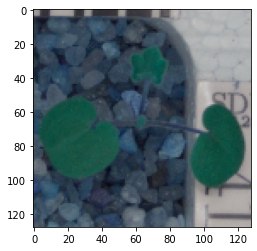

In [8]:
plt.imshow(image[2], cmap='gray')

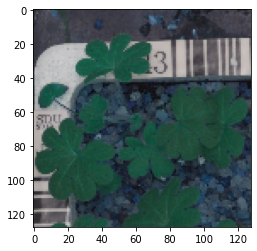

In [9]:
plt.imshow(image[3], cmap='gray')

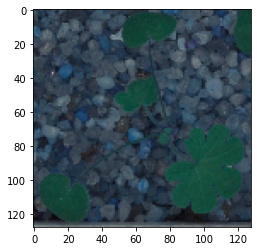

In [10]:
plt.imshow(image[33], cmap='gray')

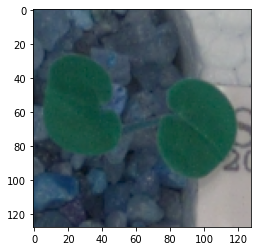

In [11]:
plt.imshow(image[36], cmap='gray')

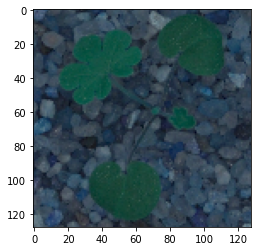

In [12]:
plt.imshow(image[59], cmap='gray')

# 4. EDA: Discover & Visualize the Data
<a id='eda'></a>
<a href='#toc'>Back to Table of Contents</a>

In [13]:
print(image)

[[[[ 35  52  78]
   [ 36  49  76]
   [ 31  45  69]
   ...
   [ 78  95 114]
   [ 76  93 110]
   [ 80  95 109]]

  [[ 33  46  68]
   [ 37  50  73]
   [ 48  65  83]
   ...
   [ 81  96 113]
   [ 74  89 105]
   [ 83  95 109]]

  [[ 34  50  68]
   [ 35  52  72]
   [ 70  85 101]
   ...
   [ 83  97 112]
   [ 79  94 108]
   [ 79  94 107]]

  ...

  [[ 35  50  69]
   [ 42  57  73]
   [ 42  57  72]
   ...
   [ 60  76  92]
   [ 67  81  97]
   [ 64  77  95]]

  [[ 36  52  67]
   [ 48  63  78]
   [ 41  57  73]
   ...
   [ 44  66  83]
   [ 58  76  91]
   [ 57  74  90]]

  [[ 44  58  70]
   [ 43  57  73]
   [ 40  55  72]
   ...
   [ 41  70  92]
   [ 55  78  97]
   [ 61  79  96]]]


 [[[ 30  47  63]
   [ 30  50  60]
   [ 34  47  63]
   ...
   [ 48  59  74]
   [ 42  54  69]
   [ 44  56  70]]

  [[ 30  49  67]
   [ 26  47  60]
   [ 30  40  61]
   ...
   [ 50  64  76]
   [ 52  67  78]
   [ 45  56  72]]

  [[ 23  46  65]
   [ 27  48  64]
   [ 25  40  59]
   ...
   [ 39  59  81]
   [ 47  62  79]
   [ 42  54

In [14]:
print(label)

                          Label
0     Small-flowered Cranesbill
1     Small-flowered Cranesbill
2     Small-flowered Cranesbill
3     Small-flowered Cranesbill
4     Small-flowered Cranesbill
...                         ...
4745           Loose Silky-bent
4746           Loose Silky-bent
4747           Loose Silky-bent
4748           Loose Silky-bent
4749           Loose Silky-bent

[4750 rows x 1 columns]


In [15]:
print(image[2])

[[[154 149 144]
  [162 156 152]
  [161 154 151]
  ...
  [175 180 183]
  [177 181 184]
  [175 179 179]]

 [[154 150 147]
  [162 156 154]
  [154 147 145]
  ...
  [168 173 180]
  [171 175 181]
  [173 176 180]]

 [[151 149 149]
  [159 155 156]
  [158 154 152]
  ...
  [173 176 180]
  [178 182 186]
  [179 182 185]]

 ...

 [[ 58  72  96]
  [ 69  83 105]
  [ 69  84 104]
  ...
  [175 170 167]
  [176 169 167]
  [176 167 165]]

 [[ 64  76  98]
  [ 77  87 108]
  [ 79  91 109]
  ...
  [177 172 170]
  [179 173 171]
  [176 169 166]]

 [[ 68  80  99]
  [ 78  89 108]
  [ 79  92 108]
  ...
  [179 173 170]
  [177 171 166]
  [178 171 167]]]


# 5. Prepare the Data
<a id='dataprep'></a>
<a href='#toc'>Back to Table of Contents</a>

## 5.1 Normalization
<a id='norm'></a>
<a href='#toc'>Back to Table of Contents</a>

In [16]:
X = image

In [17]:
y= label

In [18]:
X = X.astype('float32') / 255.0

## 5.2 Gaussian Blurring
<a id='gaussblurr'></a>
<a href='#toc'>Back to Table of Contents</a>

In [19]:
from scipy.ndimage.filters import gaussian_filter
blurred = gaussian_filter(image, sigma=1)

# 6. Make data compatible 
<a id='compatible'></a>
<a href='#toc'>Back to Table of Contents</a>

## 6.1 Convert labels to one-hot-vectors
<a id='onehotvectors'></a>
<a href='#toc'>Back to Table of Contents</a>

In [20]:
y = pd.Series(label['Label'])
one_hot = pd.get_dummies(y,sparse=True)
y = np.asarray(one_hot)

In [21]:
print(y)

[[0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [22]:
print(y.shape)

(4750, 12)


## 6.2 Print the label for y_train[0] 
<a id='labelytrain'></a>
<a href='#toc'>Back to Table of Contents</a>

In [23]:
# Set the batch size, number of epochs.
batch_size = 32
num_classes = 10
epochs = 30
num_predictions = 20

In [24]:
# Split data into test and train to build the model.
#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [25]:
type(X_train) # the data to be fed into model is of the type numpy array.

numpy.ndarray

In [26]:
y_train[0]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=uint8)

In [27]:
label_dict =  {0:'Loose Silky-bent', 1:'Common Chickweed', 2:'Scentless Mayweed', 3:'Small-flowered Cranesbill', 4:'Fat Hen', 5:'Charlock', 6:'Sugar beet', 7:'Cleavers', 8:'Black-grass', 9:'Shepherds Purse',10:'Maize',11:'Common wheat'}

 Label 
 Label Id: 0 
 Name: Loose Silky-bent


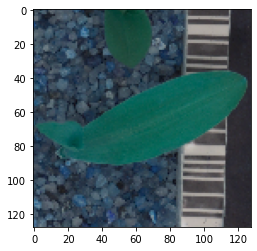

In [28]:
i = 0
image = X_train[i]
label = y_train[i][0]
print(' Label \n Label Id: {} \n Name: {}'.format(label, label_dict[label]))
plt.imshow(image);

## 6.3 Split the dataset into training, testing, and validation set
<a id='split'></a>
<a href='#toc'>Back to Table of Contents</a>

In [29]:
X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size=0.50, random_state=1)

In [30]:
print(f'training shapes: {X_train.shape}, {y_train.shape}')
print(f'validation shapes: {X_validation.shape}, {y_validation.shape}')
print(f'testing shapes: {X_test.shape}, {y_test.shape}')
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

training shapes: (3325, 128, 128, 3), (3325, 12)
validation shapes: (712, 128, 128, 3), (712, 12)
testing shapes: (713, 128, 128, 3), (713, 12)
3325 train samples
713 test samples


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


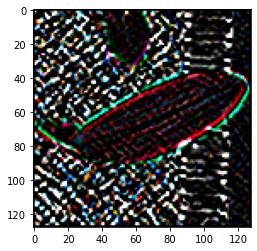

In [31]:
sobel = cv2.Sobel(image, cv2.CV_64F, 1, 1, ksize=5)
plt.imshow(sobel)

## 6.4 Shape data for Keras
<a id='shapekeras'></a>
<a href='#toc'>Back to Table of Contents</a>

In [32]:
#Convert class vectors to binary class matrices.
## One hot encore labels 0, 1, .., 9 to [0, 0, .., 1, 0, 0]
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [33]:
print(y.shape)

(4750, 12)


In [34]:
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("X_validation:",X_validation.shape)
print("y_train:", y_train.shape)
print("y_test:",y_test.shape)
print("y_validation:",y_validation.shape)

X_train: (3325, 128, 128, 3)
X_test: (713, 128, 128, 3)
X_validation: (712, 128, 128, 3)
y_train: (3325, 12, 10)
y_test: (713, 12, 10)
y_validation: (712, 12)


- Sequential model in tensorflow.keras expects data to be in the format (n_e, n_h, n_w, n_c)
- n_e= number of examples, n_h = height, n_w = width, n_c = number of channels
- do not reshape labels

In [35]:
print(X_train.shape[0])

3325


In [36]:
#X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
#X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# 7. Modeling: CNN
<a id='model'></a>
<a href='#toc'>Back to Table of Contents</a>

## 7.1 Define layers
<a id='layers'></a>
<a href='#toc'>Back to Table of Contents</a>

In [37]:
# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

## 7.2 Set optimizers and loss function
<a id='optloss'></a>
<a href='#toc'>Back to Table of Contents</a>

In [38]:
# initiate Adam optimizer
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
#opt = keras.optimizers.SGD(learning_rate=0.0001)

In [39]:
# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [40]:
# Network structure is summarized which confirms our design was implemented correctly.
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 126, 126, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 126, 126, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 63, 63, 64)        1

## 7.3 Fit & Evaluate Model
<a id='fiteval'></a>
<a href='#toc'>Back to Table of Contents</a>


In [41]:
print('Orignal xtrain shape : {}'.format(X_train.shape)) #(4750, dim, dim, 3)
print('Orignal xtest shape : {}'.format(X_test.shape))

Orignal xtrain shape : (3325, 128, 128, 3)
Orignal xtest shape : (713, 128, 128, 3)


In [42]:
X_train = X_train.astype('float32') # Conversion to float type from integer type.
X_test = X_test.astype('float32')
X_train /= 255.0 # Division by 255
X_test /= 255.0

In [43]:
from tensorflow.keras.layers import Conv2D

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=(28, 28, 1)))
model.add(Conv2D(filters=32, kernel_size=3, activation="relu"))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [44]:
model.compile(optimizer = 'Adam', loss = "categorical_crossentropy", metrics=["accuracy"])

In [45]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=180,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.3, # Randomly zoom image
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True, # randomly flip images
        )

datagen.fit(X_train)

In [46]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=6,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

In [47]:
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("X_validation:",X_validation.shape)
print("y_train:", y_train.shape)
print("y_test:",y_test.shape)
print("y_validation:",y_validation.shape)

X_train: (3325, 128, 128, 3)
X_test: (713, 128, 128, 3)
X_validation: (712, 128, 128, 3)
y_train: (3325, 12, 10)
y_test: (713, 12, 10)
y_validation: (712, 12)


In [48]:
checkpoint = ModelCheckpoint("model-{val_loss:.2f}.h5", monitor="val_loss", verbose=1, save_best_only=True, save_weights_only=True)

stop = EarlyStopping(monitor='loss', min_delta=0.01, patience=50, verbose=1, mode='min', restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_dice_coefficient', factor=0.1, patience=20, verbose=1, mode='max', min_delta=0.01, cooldown=5, min_lr=1e-6)

In [49]:
model.fit(X_train, y_train, validation_data = (X_validation, y_validation), epochs=1000, batch_size=64, verbose=1,callbacks=[stop,reduce_lr,checkpoint])

ValueError: Error when checking input: expected conv2d_4_input to have shape (28, 28, 1) but got array with shape (128, 128, 3)

In [ ]:
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_test.reshape, y_test),
          shuffle=True,
          verbose=1,
          callbacks=[early_stopping,model_checkpoint])

In [ ]:
# Score trained model.
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print("=== Confusion Matrix ===")
cm = confusion_matrix(y_test, y_pred)
print(cm)

In [ ]:
df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                     columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='d')

In [ ]:
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))

# 8. Visualize predictions for x_test[i]
<a id='pred'></a>
<a href='#toc'>Back to Table of Contents</a>

In [ ]:
predictions= model.predict(X_test)
predictions

In [ ]:
predictions = model.predict_generator(test_batches, steps=1, verbose=0)
predictions

In [ ]:
predictions
y_pred=[]
for i in range(len(predictions)):
    y_pred.append(np.argmax(predictions[i]))
print(y_pred)
#plots(test_imgs, titles=y_pred)

ctr=0
for i in range(len(y_pred)):
    if y_pred[i] == y_test[i]:
        ctr=ctr+1
res = ctr/len(y_pred)*100
print(res)

## 8.1 x_test[2] 
<a id='2'></a>
<a href='#toc'>Back to Table of Contents</a>

In [ ]:
i = 2
image = X_test[i]
label = y_test[i][0]
print(' Label \n Label Id: {} \n Name: {}'.format(label, label_dict[label]))
plt.imshow(image);

## 8.2 x_test[3]
<a id='3'></a>
<a href='#toc'>Back to Table of Contents</a>

## 8.3 x_test[33]
<a id='33'></a>
<a href='#toc'>Back to Table of Contents</a>

## 8.4 x_test[36]
<a id='36'></a>
<a href='#toc'>Back to Table of Contents</a>

## 8.5 x_test[59]
<a id='59'></a>
<a href='#toc'>Back to Table of Contents</a>